In [ ]:
'''
Mobile Price Classification with Machine Learning

data source: https://thecleverprogrammer.com/2021/03/05/mobile-price-classification-with-machine-learning/
'''

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mobile_prices.csv")

## EDA

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


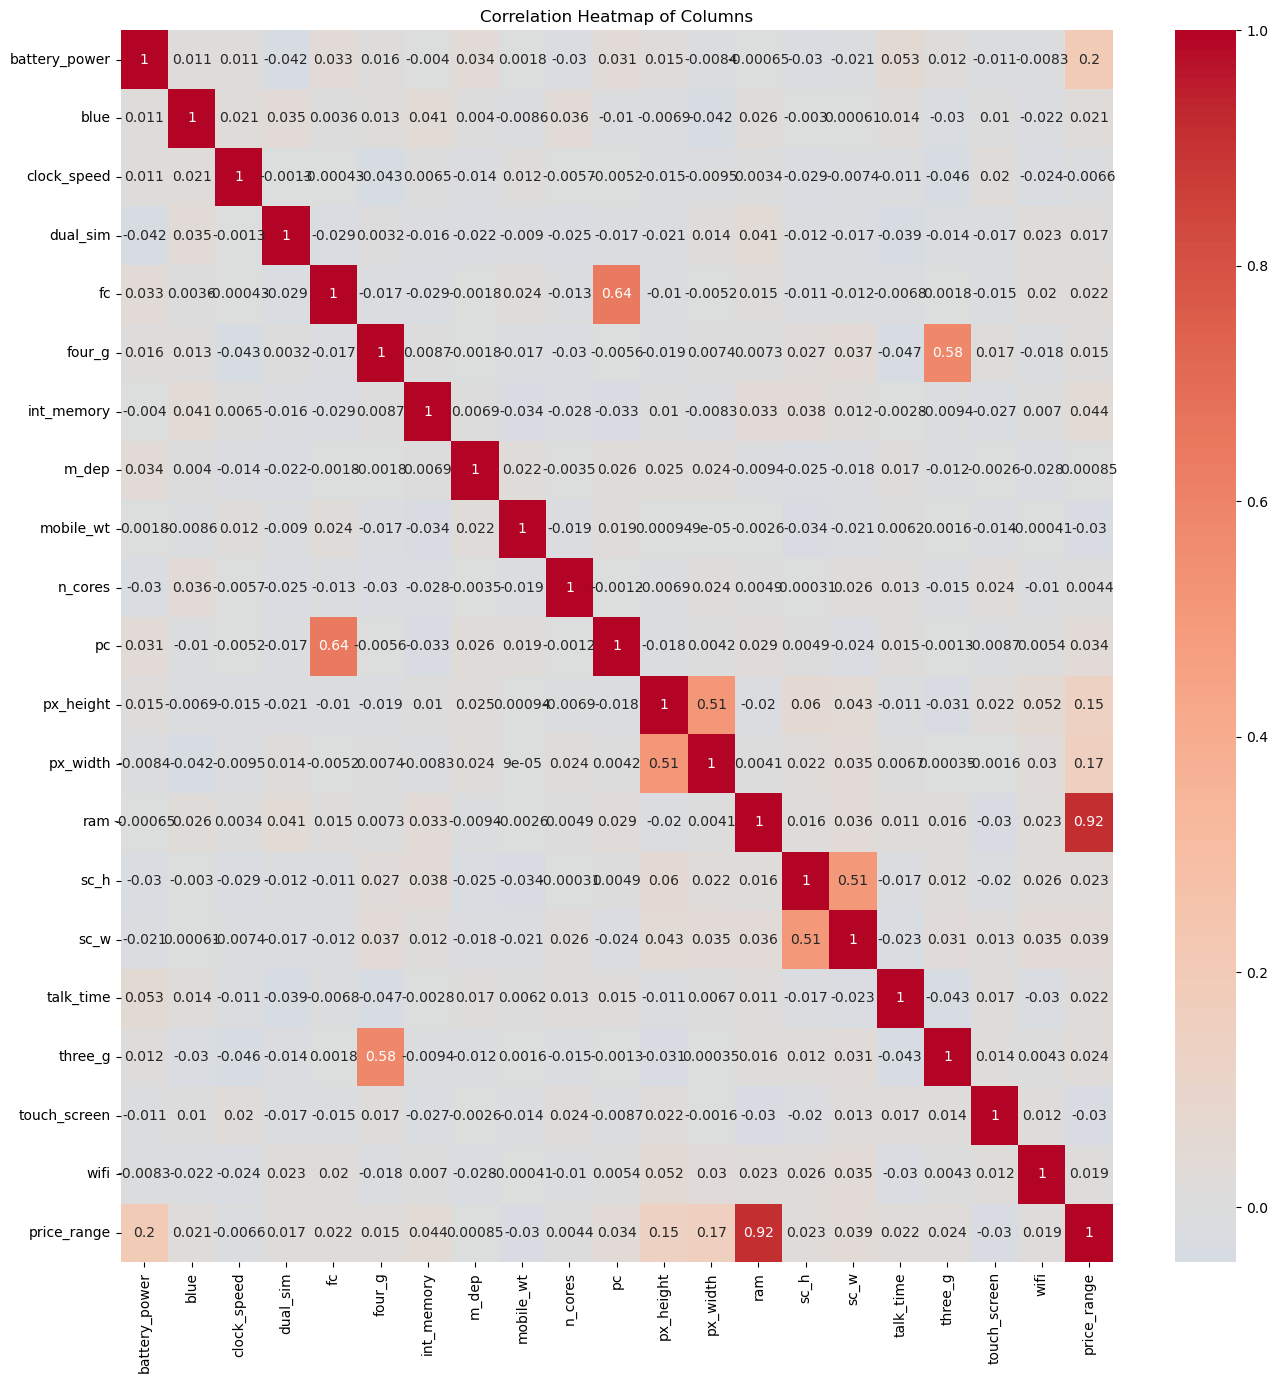

In [4]:
# Create a heatmap using seaborn
plt.figure(figsize=(16, 16))  # Adjust the size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Columns')
plt.show()

In [5]:
abs(df.corr()['price_range']).sort_values(ascending=False)  

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
y = df['price_range'];
#x = df.drop(columns=['price_range'])
# considering columns that have above 20% correlation
x = df[ ['ram','battery_power','px_width','px_height','int_memory','sc_w','pc','touch_screen',
'mobile_wt','three_g','sc_h','fc','talk_time','blue']]


In [8]:

def algo_test(x,y):
    
    import numpy as np

    from scipy import stats
    import matplotlib.pyplot as plt
    %matplotlib inline 
    import seaborn as sns


    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
    from sklearn.tree import ExtraTreeClassifier
    from sklearn.ensemble import GradientBoostingRegressor
    from xgboost import XGBRegressor 

    from sklearn.model_selection import train_test_split

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesClassifier

    import warnings
    warnings.filterwarnings('ignore')
#plt.style.use('')

    
    
    G = GaussianNB()
    B = BernoulliNB()
    K = KNeighborsClassifier()
    L = LogisticRegression()
    D = DecisionTreeClassifier()
    RF = RandomForestClassifier()
    ETC = ExtraTreesClassifier()

    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 13)
    
    algos = [G,B,K,L,D, RF, ETC]
    
    algo_names = [ "Gaussian", "Bernoulli", "K-Neighbors", "Logistic Regression", "Decision Tree", "Random Forest", "ExtraTreeClassifier" ]
    
    ASC = [];
    
    result =  result = pd.DataFrame(columns =['Accuracy_Score'], index = algo_names)
    
    i = 0;
    for algo in algos :
        
        algo.fit(x_train,y_train)
        #print (accuracy_score(  y_test, algo.predict(x_test) ))
        ASC.append(  accuracy_score(  y_test, algo.predict(x_test) ) )
        
        print( "Confusion matrix: ",format(algo_names[i]) )
        i = i+1;
        print ( confusion_matrix(algo.predict(x_test),y_test) )
        print (classification_report(y_test,algo.predict(x_test) ))
        
        #algo.fit(x,y)
        #print (accuracy_score(  y, algo.predict(x) ))
        #ASC.append(  accuracy_score(  y, algo.predict(x) ) )
    
    
    result.Accuracy_Score = ASC;

    return result.sort_values('Accuracy_Score', ascending=False)
    

In [9]:
algo_test(x,y)

Confusion matrix:  Gaussian
[[81 11  0  0]
 [15 76 15  0]
 [ 0 20 73 19]
 [ 0  0  7 83]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        96
           1       0.72      0.71      0.71       107
           2       0.65      0.77      0.71        95
           3       0.92      0.81      0.86       102

    accuracy                           0.78       400
   macro avg       0.79      0.78      0.79       400
weighted avg       0.79      0.78      0.79       400

Confusion matrix:  Bernoulli
[[19 27 26 24]
 [13  9  5  4]
 [39 40 36 43]
 [25 31 28 31]]
              precision    recall  f1-score   support

           0       0.20      0.20      0.20        96
           1       0.29      0.08      0.13       107
           2       0.23      0.38      0.28        95
           3       0.27      0.30      0.29       102

    accuracy                           0.24       400
   macro avg       0.25      0.24      0.22       400
weight

,Accuracy_Score
K-Neighbors,0.9250
Random Forest,0.8875
ExtraTreeClassifier,0.8775
Decision Tree,0.8300
Gaussian,0.7825
Logistic Regression,0.5950
Bernoulli,0.2375
